<a href="https://colab.research.google.com/github/hcoh99/AI_study/blob/main/CNN_UNSW_NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [29]:
names = ['srcip','sport','dstip','dsport','proto','state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']
data = pd.read_csv ("/content/UNSW-NB15_1.csv",names = names)
data

<ipython-input-29-142e501c230a>:2: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv ("/content/UNSW-NB15_1.csv",names = names)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132.0,164.0,31.0,...,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,NaN,0.0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528.0,304.0,31.0,...,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,NaN,0.0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146.0,178.0,31.0,...,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132.0,164.0,31.0,...,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146.0,178.0,31.0,...,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311979,59.166.0.3,35758.0,149.171.126.3,80.0,tcp,FIN,1.005953,1580.0,10168.0,31.0,...,0.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,0.0
311980,59.166.0.0,21693.0,149.171.126.6,20568.0,tcp,FIN,0.010178,2334.0,16734.0,31.0,...,0.0,7.0,7.0,3.0,2.0,1.0,1.0,1.0,NaN,0.0
311981,59.166.0.1,58337.0,149.171.126.6,26511.0,tcp,FIN,0.028782,3926.0,58386.0,31.0,...,0.0,11.0,7.0,3.0,2.0,1.0,1.0,1.0,NaN,0.0
311982,59.166.0.2,30491.0,149.171.126.8,111.0,udp,CON,0.004874,568.0,312.0,31.0,...,0.0,8.0,10.0,6.0,3.0,1.0,1.0,3.0,NaN,0.0


Text(0.5, 1.0, 'Label')

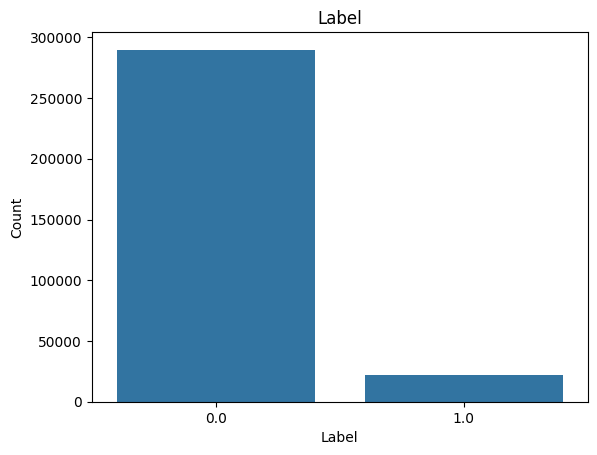

In [30]:

# 레이블 갯수 확인 (그래프)
sns.countplot(data = data, x="Label")
plt.ylabel("Count")
plt.title("Label")

In [31]:
# 레이블 갯수 확인 (숫자)
data['Label'].value_counts()

0.0    289768
1.0     22215
Name: Label, dtype: int64

In [32]:
# 결측치 확인
data.isnull().sum()

srcip                    0
sport                    1
dstip                    1
dsport                   1
proto                    1
state                    1
dur                      1
sbytes                   1
dbytes                   1
sttl                     1
dttl                     1
sloss                    1
dloss                    1
service                  1
Sload                    1
Dload                    1
Spkts                    1
Dpkts                    1
swin                     1
dwin                     1
stcpb                    1
dtcpb                    1
smeansz                  1
dmeansz                  1
trans_depth              1
res_bdy_len              1
Sjit                     1
Djit                     1
Stime                    1
Ltime                    1
Sintpkt                  1
Dintpkt                  1
tcprtt                   1
synack                   1
ackdat                   1
is_sm_ips_ports          1
ct_state_ttl             1
c

In [33]:
data = data.drop('attack_cat' , axis=1)

In [34]:
# 결측치 제거
data = data.dropna()
data.isnull().sum()

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_dst_spo

In [35]:
data


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132.0,164.0,31.0,...,0.0,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,0.0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528.0,304.0,31.0,...,0.0,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,0.0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146.0,178.0,31.0,...,0.0,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,0.0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132.0,164.0,31.0,...,0.0,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,0.0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146.0,178.0,31.0,...,0.0,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311978,59.166.0.9,47461.0,149.171.126.7,47121.0,tcp,FIN,0.010143,2334.0,16734.0,31.0,...,0.0,0.0,3.0,8.0,1.0,4.0,1.0,1.0,1.0,0.0
311979,59.166.0.3,35758.0,149.171.126.3,80.0,tcp,FIN,1.005953,1580.0,10168.0,31.0,...,0.0,0.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,0.0
311980,59.166.0.0,21693.0,149.171.126.6,20568.0,tcp,FIN,0.010178,2334.0,16734.0,31.0,...,0.0,0.0,7.0,7.0,3.0,2.0,1.0,1.0,1.0,0.0
311981,59.166.0.1,58337.0,149.171.126.6,26511.0,tcp,FIN,0.028782,3926.0,58386.0,31.0,...,0.0,0.0,11.0,7.0,3.0,2.0,1.0,1.0,1.0,0.0


<ipython-input-36-6bf798923233>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


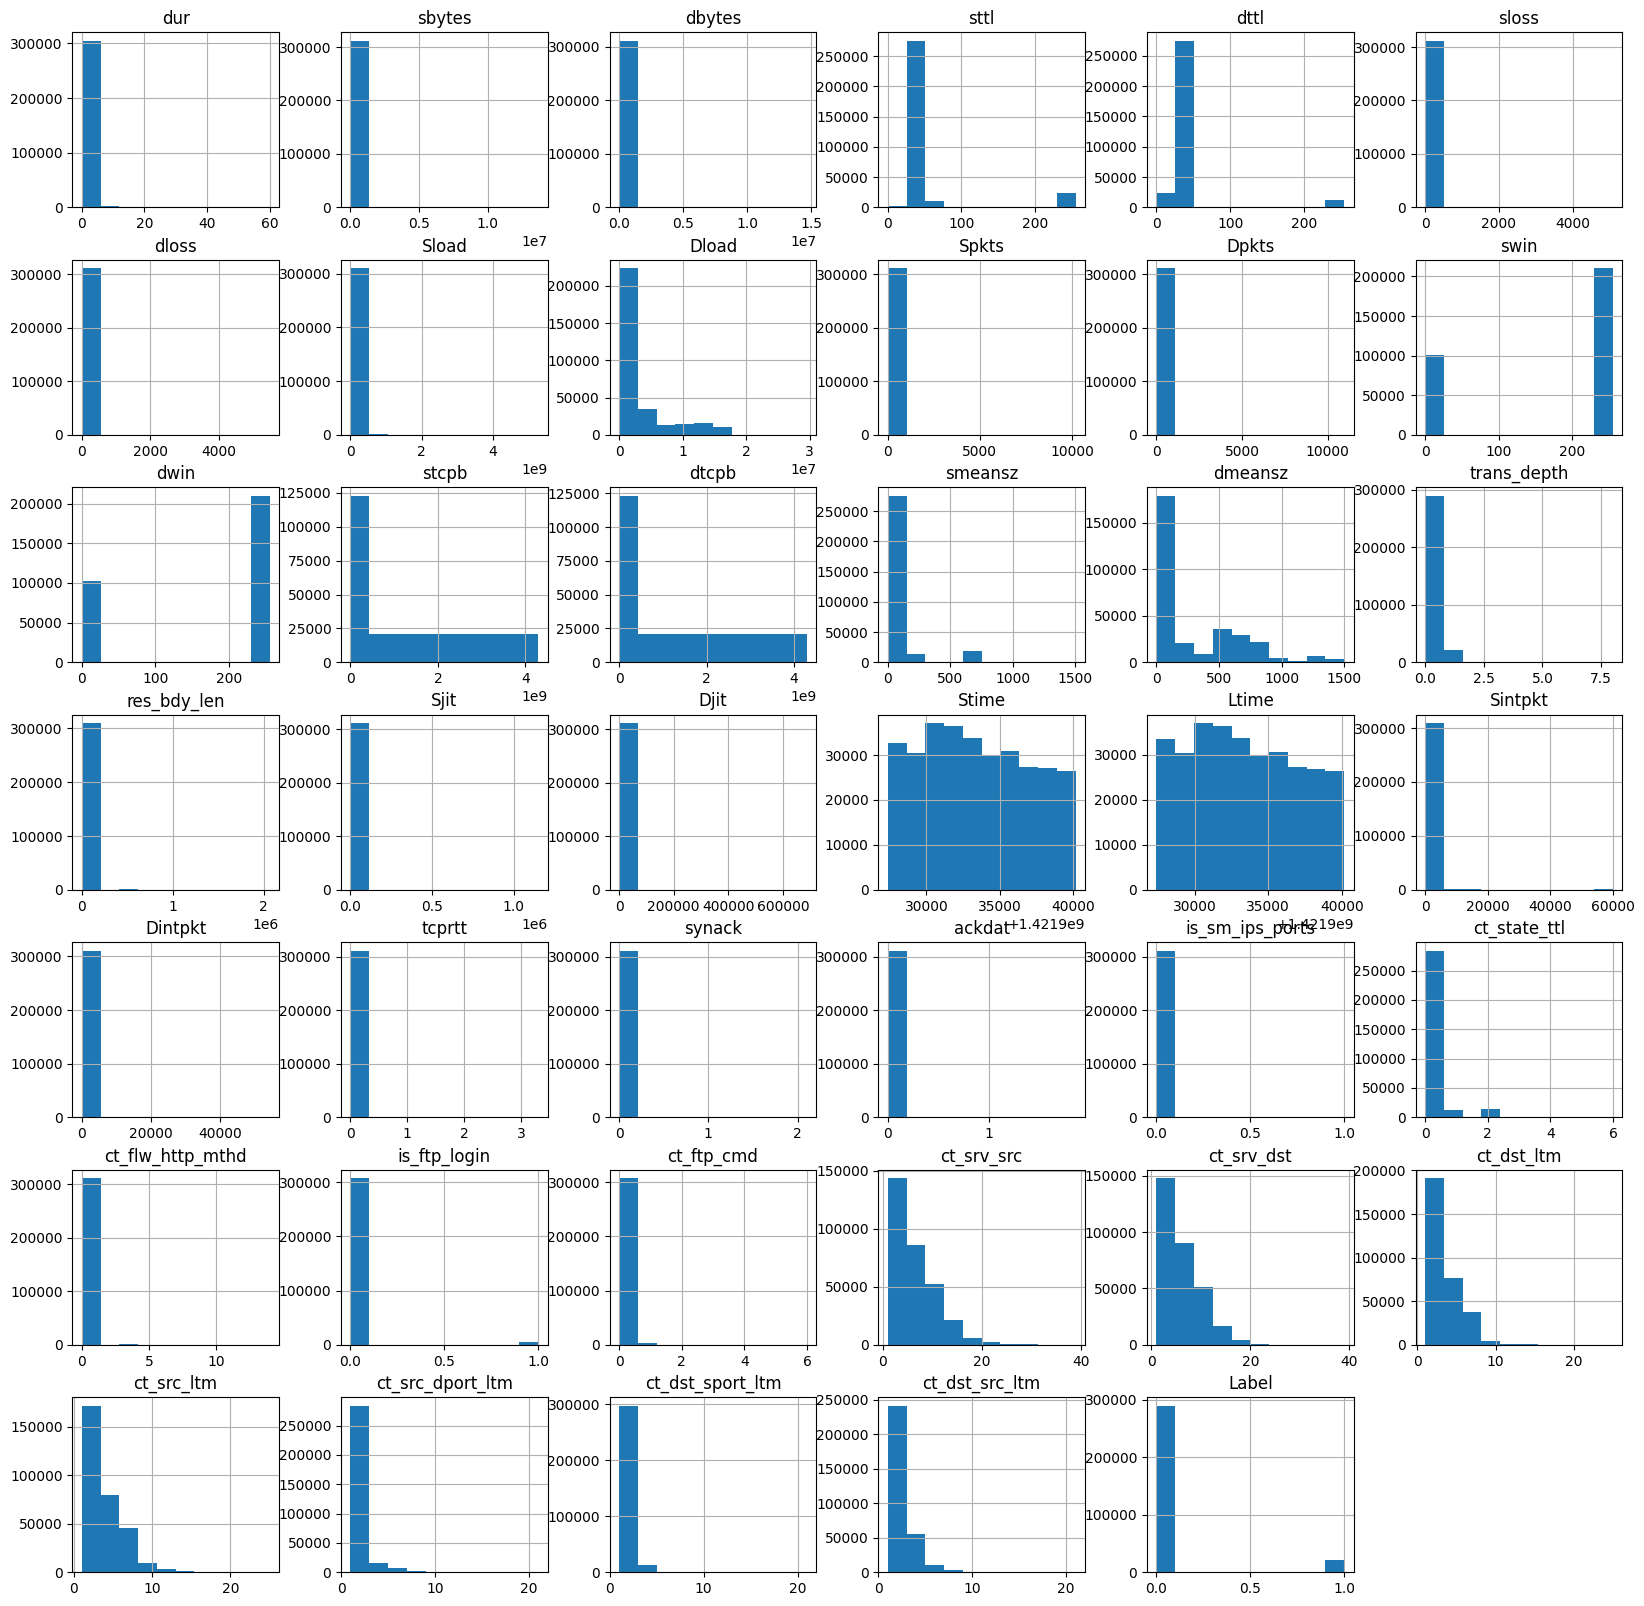

In [36]:

# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [38]:
data['service']

0          dns
1            -
2          dns
3          dns
4          dns
          ... 
311978       -
311979    http
311980       -
311981       -
311982       -
Name: service, Length: 311983, dtype: object

In [39]:
data['srcip']

0         59.166.0.0
1         59.166.0.0
2         59.166.0.6
3         59.166.0.5
4         59.166.0.3
             ...    
311978    59.166.0.9
311979    59.166.0.3
311980    59.166.0.0
311981    59.166.0.1
311982    59.166.0.2
Name: srcip, Length: 311983, dtype: object

In [40]:
df_shuffled = data.sample(frac=1)

# 절반만 선택

data = df_shuffled.iloc[:len(df_shuffled)//2]

In [41]:
import numpy as np

# IP 주소를 정수로 변환하는 함수
def ip_to_int(ip):
    parts = np.array(ip.split('.')).astype(int)
    return np.sum(parts * np.array([256**i for i in range(3, -1, -1)]))


In [42]:
for i in data['srcip']:
  data['srcip'] = ip_to_int(i)

<ipython-input-42-05db495c1eb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['srcip'] = ip_to_int(i)


In [43]:
data = data.drop('dsport' , axis=1)
data = data.drop('sport' , axis=1)

In [45]:
label_encode = LabelEncoder()
data['proto'] = label_encode.fit_transform(data['proto'].values.ravel())
data['dstip'] = label_encode.fit_transform(data['dstip'].values.ravel())
data['state'] = label_encode.fit_transform(data['state'].values.ravel())
data['service']= label_encode.fit_transform(data['service'].values.ravel())
data

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
187097,1000734725,23,114,5,0.045637,4550.0,67380.0,31.0,29.0,7.0,...,0.0,0.0,21.0,11.0,2.0,5.0,1.0,1.0,1.0,0.0
46149,1000734725,5,114,5,0.106287,8928.0,320.0,31.0,29.0,4.0,...,0.0,0.0,3.0,3.0,5.0,8.0,1.0,1.0,4.0,0.0
280172,1000734725,4,114,5,0.028905,4014.0,57846.0,31.0,29.0,7.0,...,0.0,0.0,5.0,12.0,1.0,2.0,1.0,1.0,1.0,0.0
236395,1000734725,19,114,5,0.017941,3302.0,35400.0,31.0,29.0,7.0,...,0.0,0.0,5.0,5.0,4.0,2.0,1.0,1.0,2.0,0.0
257243,1000734725,5,120,2,0.000989,146.0,178.0,31.0,29.0,0.0,...,0.0,0.0,4.0,6.0,4.0,5.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310926,1000734725,21,114,5,0.026298,2854.0,30384.0,31.0,29.0,7.0,...,0.0,0.0,7.0,8.0,3.0,5.0,1.0,1.0,2.0,0.0
133975,1000734725,22,120,2,0.001036,146.0,178.0,31.0,29.0,0.0,...,0.0,0.0,7.0,6.0,3.0,2.0,1.0,1.0,2.0,0.0
165430,1000734725,17,114,5,0.005218,1036.0,2262.0,31.0,29.0,4.0,...,0.0,0.0,11.0,10.0,2.0,3.0,1.0,1.0,1.0,0.0
59318,1000734725,18,114,5,0.020957,3182.0,39076.0,31.0,29.0,7.0,...,0.0,0.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,0.0


In [46]:
y=data['Label']
y.value_counts()

0.0    144969
1.0     11022
Name: Label, dtype: int64

In [47]:
X=data.drop('Label',axis=1)
X.head()

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
187097,1000734725,23,114,5,0.045637,4550.0,67380.0,31.0,29.0,7.0,...,0.0,0.0,0.0,21.0,11.0,2.0,5.0,1.0,1.0,1.0
46149,1000734725,5,114,5,0.106287,8928.0,320.0,31.0,29.0,4.0,...,0.0,0.0,0.0,3.0,3.0,5.0,8.0,1.0,1.0,4.0
280172,1000734725,4,114,5,0.028905,4014.0,57846.0,31.0,29.0,7.0,...,0.0,0.0,0.0,5.0,12.0,1.0,2.0,1.0,1.0,1.0
236395,1000734725,19,114,5,0.017941,3302.0,35400.0,31.0,29.0,7.0,...,0.0,0.0,0.0,5.0,5.0,4.0,2.0,1.0,1.0,2.0
257243,1000734725,5,120,2,0.000989,146.0,178.0,31.0,29.0,0.0,...,0.0,0.0,0.0,4.0,6.0,4.0,5.0,3.0,1.0,1.0


In [48]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [49]:

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [50]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 50)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 50)
print(X_test.shape, y_test.shape)

(140342, 50, 45) (140342,)
(15551, 50, 45) (15551,)


In [51]:

y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [52]:
X_train = X_train.astype('float32')
y_train_onehot = y_train_onehot.astype('float32')
X_test = X_test.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')

In [53]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [54]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [55]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 45)]          0         
                                                                 
 conv1d (Conv1D)             (None, 48, 64)            8704      
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 205506 (802.76 KB)
Trainable params: 205506 (802.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
train_epochs = 17
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/17
3948/3948 [==============================] - 21s 4ms/step - loss: 771726.7500 - accuracy: 0.9253 - val_loss: 282.7404 - val_accuracy: 0.9296
Epoch 2/17
3948/3948 [==============================] - 17s 4ms/step - loss: 0.2564 - accuracy: 0.9291 - val_loss: 282.7380 - val_accuracy: 0.9296
Epoch 3/17
3948/3948 [==============================] - 16s 4ms/step - loss: 0.2560 - accuracy: 0.9291 - val_loss: 282.7380 - val_accuracy: 0.9296
Epoch 4/17
3948/3948 [==============================] - 16s 4ms/step - loss: 0.2560 - accuracy: 0.9291 - val_loss: 282.7380 - val_accuracy: 0.9296
Epoch 5/17
3948/3948 [==============================] - 16s 4ms/step - loss: 0.2560 - accuracy: 0.9291 - val_loss: 282.7379 - val_accuracy: 0.9296
Epoch 6/17
3948/3948 [==============================] - 16s 4ms/step - loss: 0.2560 - accuracy: 0.9291 - val_loss: 282.7380 - val_accuracy: 0.9296
Epoch 7/17
3948/3948 [==============================] - 16s 4ms/step - loss: 0.2560 - accuracy: 0.9291 - val_loss

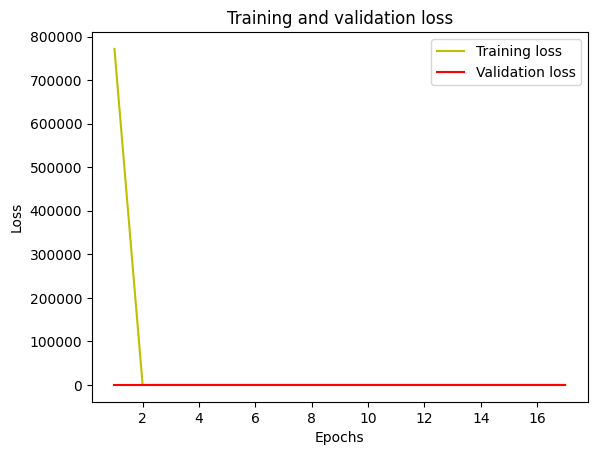

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

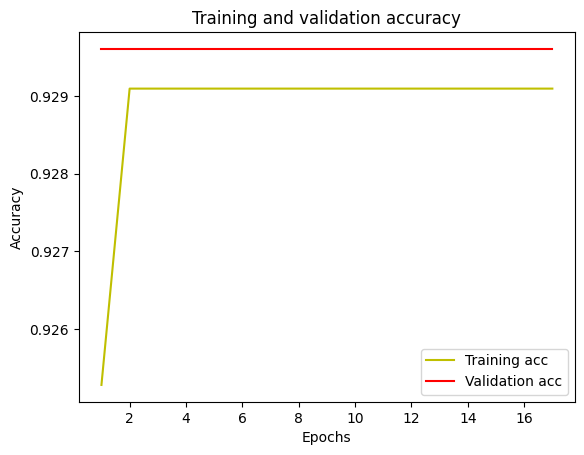

In [58]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

486/486 [==============================] - 2s 3ms/step


In [60]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     14476
           1       0.00      0.00      0.00      1075

    accuracy                           0.93     15551
   macro avg       0.47      0.50      0.48     15551
weighted avg       0.87      0.93      0.90     15551

[[14476     0]
 [ 1075     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
